# Cat vs Dog (image classification)

**Classification using Convolutional Neural Network**

- [Importing Libraries](#Importing-Libraries)
- [Data preparation for Traning](#Data-preparation-for-Traning)
- [Model Architecture](#Model-Architecture)
- [Model Training](#Model-Training)
- [Model Evaluation](#Model-Evaluation)
- [Model Testing and Prediction](#Model-Testing-and-Prediction)

#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np

# import warnings 
# warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

#### Data visualization

In [2]:
path = './train'
classes = os.listdir(path) 
classes 

['cats', 'dogs']

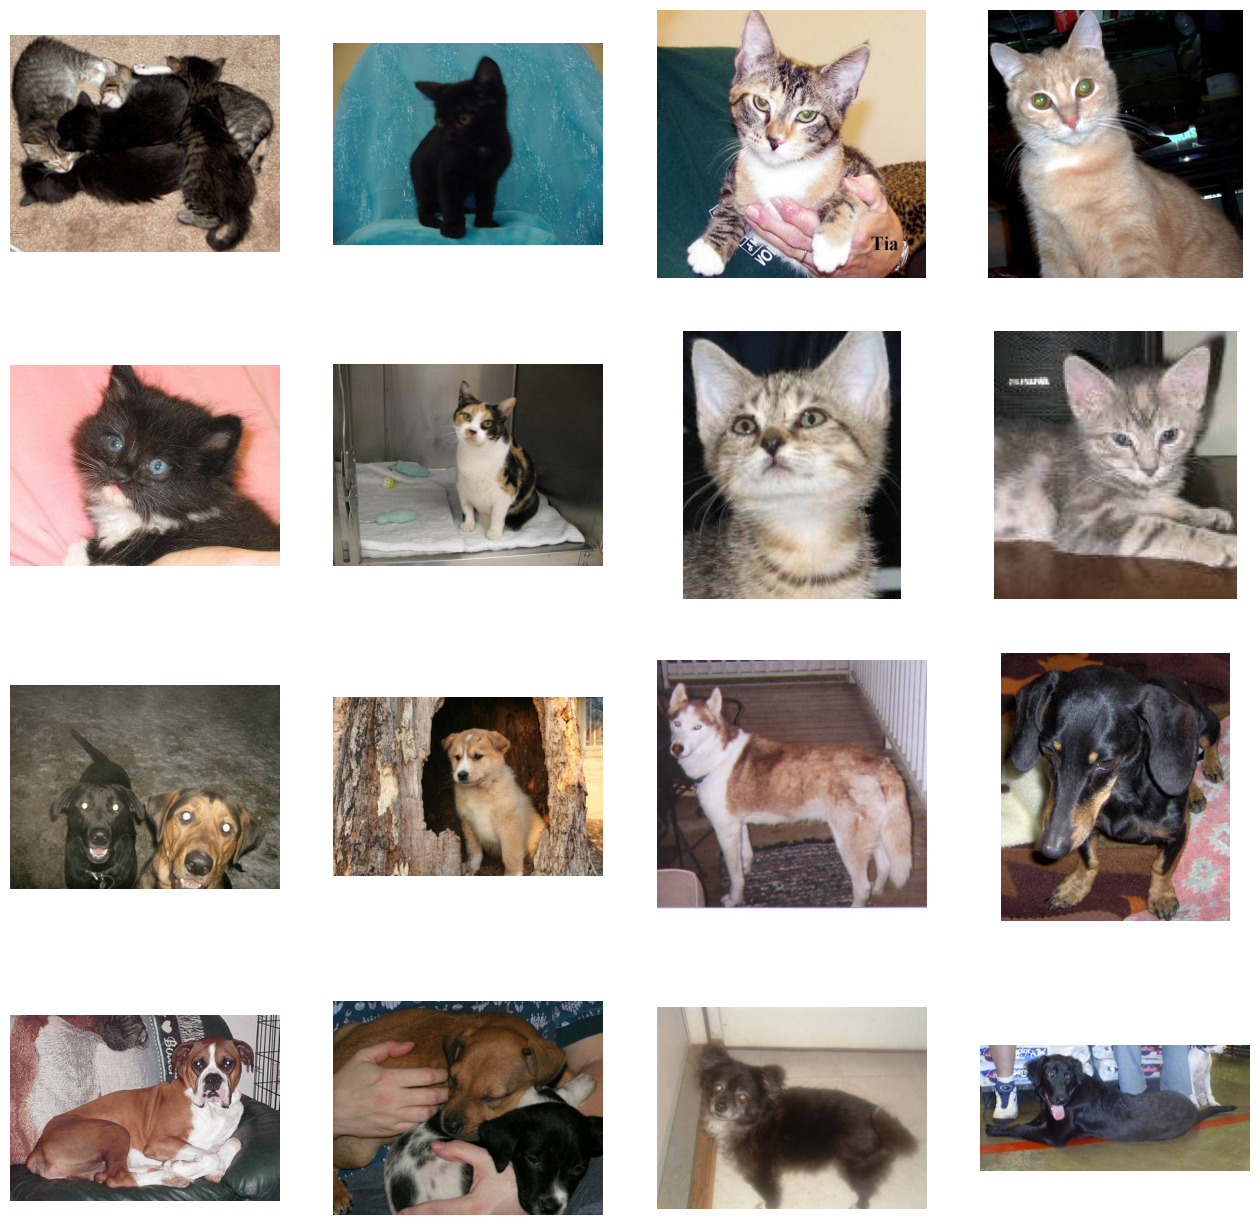

In [3]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 
  
cat_dir = os.path.join(path, classes[0]) 
dog_dir = os.path.join(path, classes[1]) 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 
  
pic_index = 210
  
cat_images = [os.path.join(cat_dir, fname) 
              for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
              for fname in dog_names[pic_index-8:pic_index]] 
  
for i, img_path in enumerate(cat_images + dog_images): 
    sp = plt.subplot(4, 4, i+1) 
    sp.axis('Off') 
  
    img = mpimg.imread(img_path) 
    plt.imshow(img) 
  
plt.show() 

#### Data Preparation for Training

In [4]:
base_dir = './train'
  
# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='training', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='validation', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32)

Found 5533 files belonging to 2 classes.
Using 4980 files for training.
Found 5533 files belonging to 2 classes.
Using 553 files for validation.


#### Model Architecture

In [5]:
model = tf.keras.models.Sequential([ 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
  
    layers.Flatten(), 
    layers.Dense(512, activation='relu'), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.1), 
    layers.BatchNormalization(), 
    layers.Dense(512, activation='relu'), 
    layers.Dropout(0.2), 
    layers.BatchNormalization(), 
    layers.Dense(1, activation='sigmoid') 
]) 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [7]:
model.compile( 
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
) 

#### Model Training

In [8]:
history = model.fit(train_datagen, 
          epochs=20, 
          validation_data=test_datagen) 

Epoch 1/20
156/156 [==============================] - 169s 1s/step - loss: 0.7899 - accuracy: 0.5538 - val_loss: 0.6731 - val_accuracy: 0.6257
Epoch 2/20
156/156 [==============================] - 152s 971ms/step - loss: 0.6858 - accuracy: 0.6052 - val_loss: 1.1809 - val_accuracy: 0.4991
Epoch 3/20
156/156 [==============================] - 152s 971ms/step - loss: 0.6383 - accuracy: 0.6488 - val_loss: 0.9304 - val_accuracy: 0.5371
Epoch 4/20
156/156 [==============================] - 155s 995ms/step - loss: 0.6250 - accuracy: 0.6651 - val_loss: 0.8422 - val_accuracy: 0.5280
Epoch 5/20
156/156 [==============================] - 149s 956ms/step - loss: 0.5769 - accuracy: 0.6944 - val_loss: 0.8936 - val_accuracy: 0.5787
Epoch 6/20
156/156 [==============================] - 149s 956ms/step - loss: 0.5970 - accuracy: 0.6763 - val_loss: 0.8040 - val_accuracy: 0.5606
Epoch 7/20
156/156 [==============================] - 148s 949ms/step - loss: 0.6592 - accuracy: 0.6171 - val_loss: 1.3767 - va

#### Model Evaluation

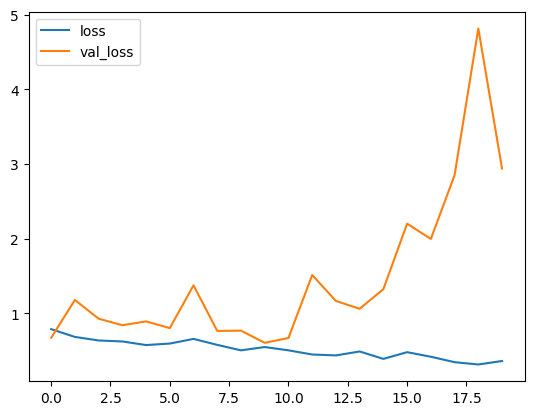

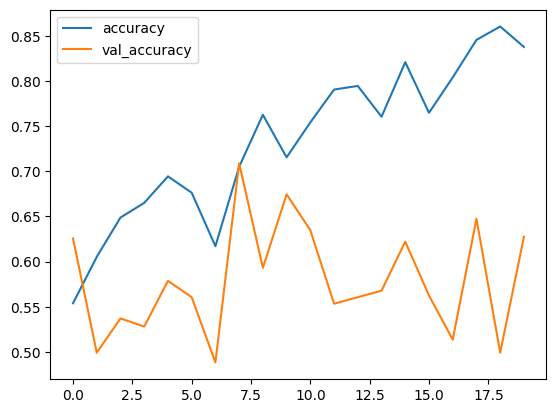

In [9]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

#### Model Testing and Prediction

1/1 [==============================] - 0s 60ms/step
Cat


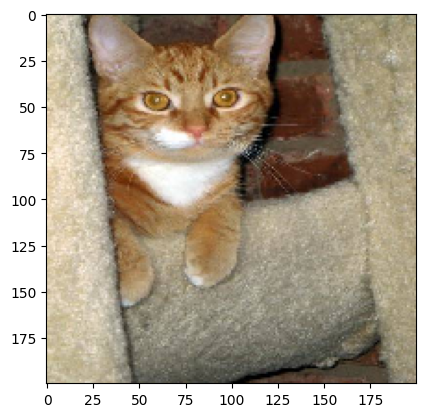

In [24]:
from tensorflow.keras.preprocessing import image
  
#Input image 
test_image = image.load_img('./test/15.jpg',target_size=(200,200)) 
  
#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 
  
# Result array 
result = model.predict(test_image) 
  
#Mapping result array with the main name list 
i=0
if(result>=0.5): 
  print("Dog") 
else: 
  print("Cat")